##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [2]:
# 1. Potrzebne importy
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **Zbiór SCORES.csv**

In [53]:
# 2. Dane z pliku SCORES.csv
scores = pd.read_csv("SCORES.csv")
print("Dataframe:", scores.head(), end='\n\n')
print("Describe df:\n", scores.describe(), end='\n\n')
print("Shape = ", scores.shape, end='\n\n')
print("Info: ", scores.info())

Dataframe:    Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Describe df:
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Shape =  (25, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
Info:  None


Text(0, 0.5, 'Liczba uzyskanych punktów')

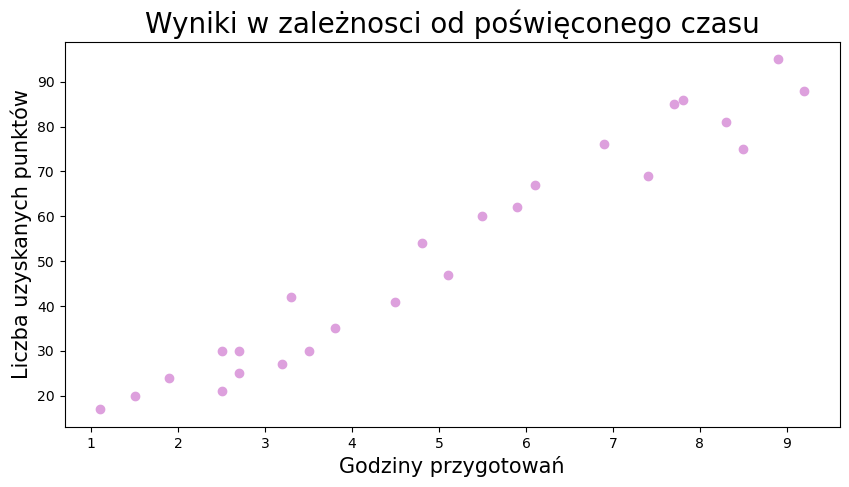

In [54]:
# 3. Wstępny wykres danych
plt.figure(figsize=(10, 5))
plt.scatter(x=scores.Hours, y=scores.Scores, color = "plum")
plt.title("Wyniki w zależnosci od poświęconego czasu", fontsize=20)
plt.xlabel("Godziny przygotowań", fontsize=15)
plt.ylabel("Liczba uzyskanych punktów", fontsize=15)

In [55]:
# 4. Podział danych na zbiory

# Dane niezależna - predyktor godziny poświęcone na przygotowania - Zbiór X
# Dana zależna - wynikowa - Uzyskane punkty zbiór y

# Podział na zbiory testowe, i treningowe
wej = scores.Hours
wyj = scores.Scores

X_train, X_test, y_train, y_test = train_test_split(wej, wyj, train_size=0.3, shuffle=True) 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print("X_train:\n", X_train, end='\n\n')
print("y_train:\n", y_train, end='\n\n')
print("X_test:\n", X_test, end='\n\n')
print("y_test:\n", y_test)

X_train:
 [[9.2]
 [5.5]
 [1.1]
 [3.8]
 [2.7]
 [3.3]
 [2.7]]

y_train:
 [[88]
 [60]
 [17]
 [35]
 [25]
 [42]
 [30]]

X_test:
 [[5.9]
 [8.9]
 [1.5]
 [8.3]
 [8.5]
 [2.5]
 [4.8]
 [4.5]
 [2.5]
 [7.7]
 [3.5]
 [6.1]
 [3.2]
 [5.1]
 [6.9]
 [7.4]
 [7.8]
 [1.9]]

y_test:
 [[62]
 [95]
 [20]
 [81]
 [75]
 [21]
 [54]
 [41]
 [30]
 [85]
 [30]
 [67]
 [27]
 [47]
 [76]
 [69]
 [86]
 [24]]


In [56]:
# 5. Model regresji liniowej
reg = LinearRegression().fit(X_train, y_train)
reg_score = reg.score(X_train, y_train)
print("Współczynnik determinacji jest równy:", reg_score)

Współczynnik determinacji jest równy: 0.9670769301315789


In [57]:
# 6. Wskaźniki coef_ oraz intercept_
print("Współczynnik nachylenia prostej w danym modelu jest równy:", reg.coef_)
print("Wyraz wolny w danym modelu jest równy:", reg.intercept_)

Współczynnik nachylenia prostej w danym modelu jest równy: [[9.07926369]]
Wyraz wolny w danym modelu jest równy: [5.72240538]


In [58]:
# 7. Predykcja dla części testowej X
y_pred = reg.predict(X_test)
print("Wynik predykcji:\n", y_pred)
print("\nWynik dla posiadanych danych:\n", y_test)

Wynik predykcji:
 [[59.29006113]
 [86.52785219]
 [19.34130091]
 [81.08029398]
 [82.89614671]
 [28.4205646 ]
 [49.30287108]
 [46.57909197]
 [28.4205646 ]
 [75.63273576]
 [37.49982828]
 [61.10591387]
 [34.77604918]
 [52.02665018]
 [68.36932482]
 [72.90895666]
 [76.54066213]
 [22.97300639]]

Wynik dla posiadanych danych:
 [[62]
 [95]
 [20]
 [81]
 [75]
 [21]
 [54]
 [41]
 [30]
 [85]
 [30]
 [67]
 [27]
 [47]
 [76]
 [69]
 [86]
 [24]]


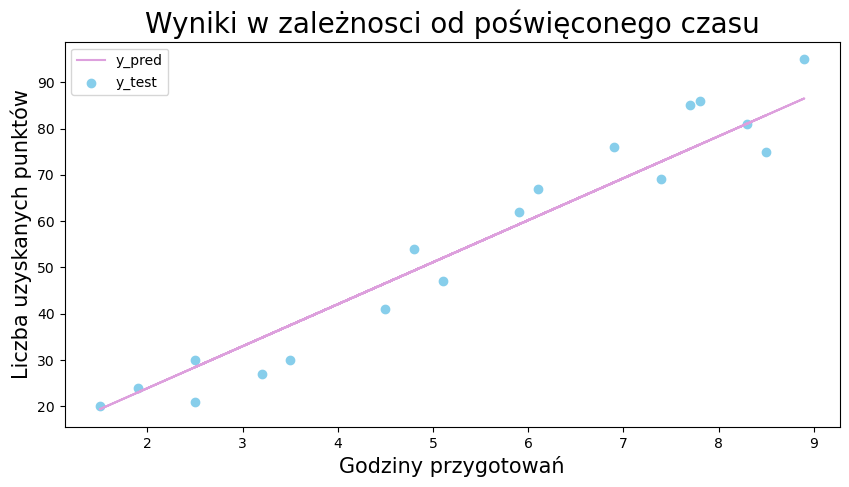

In [61]:
# 8. Porównanie danych testowych z predykcją
plt.figure(figsize=(10,5))
plt.plot(X_test, y_pred, label="y_pred", color="plum")
plt.scatter(X_test, y_test, label="y_test", color='skyblue')
plt.legend()
plt.title("Wyniki w zależnosci od poświęconego czasu", fontsize=20)
plt.xlabel("Godziny przygotowań", fontsize=15)
plt.ylabel("Liczba uzyskanych punktów", fontsize=15)
plt.show()

In [62]:
# 9. Walidacja uzyskanych predykcji
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error = {mae}\n" + 
      f"Mean Squared Error = {mse}\n" + 
      f"Root Mean Squared Error {rmse}")

Mean Absolute Error = 5.3712938159672134
Mean Squared Error = 37.842644817406416
Root Mean Squared Error 6.151637572013359


# **Zbiór SBP.csv**

In [63]:
# 2. Dane z pliku SBP.csv
sbp = pd.read_csv("SBP.csv")
print("Dataframe:", sbp.head(), end='\n\n')
print("Describe df:\n", sbp.describe(), end='\n\n')
print("Shape = ", sbp.shape, end='\n\n')
print("Info: ", sbp.info())

Dataframe:    Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132

Describe df:
              Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000

Shape =  (19, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     19 non-null     int64
 1   SBP     19 non-null     int64
dtypes: int64(2)
memory usage: 432.0 bytes
Info:  None


Text(0, 0.5, 'Wskaźnik ciśnienia')

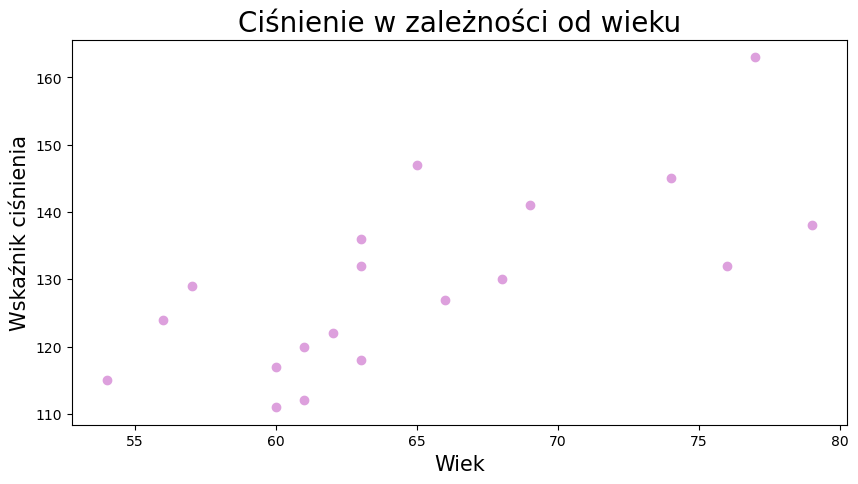

In [64]:
# 3. Wstępny wykres danych
plt.figure(figsize=(10, 5))
plt.scatter(x=sbp.Age, y=sbp.SBP, color = "plum")
plt.title("Ciśnienie w zależności od wieku", fontsize=20)
plt.xlabel("Wiek", fontsize=15)
plt.ylabel("Wskaźnik ciśnienia", fontsize=15)

In [85]:
# 4. Podział danych na zbiory

# Dane niezależna - wiek osoby badanej - Zbiór X
# Dana zależna - wynikowa - wynik pomiaru cinienia - Zbiór y

# Podział na zbiory testowe, i treningowe
wej = sbp.Age
wyj = sbp.SBP

X_train, X_test, y_train, y_test = train_test_split(wej, wyj, train_size=0.3, random_state=42) 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print("X_train:\n", X_train, end='\n\n')
print("y_train:\n", y_train, end='\n\n')
print("X_test:\n", X_test, end='\n\n')
print("y_test:\n", y_test)

X_train:
 [[60]
 [77]
 [63]
 [65]
 [66]]

y_train:
 [[111]
 [163]
 [118]
 [147]
 [127]]

X_test:
 [[60]
 [68]
 [76]
 [61]
 [63]
 [69]
 [57]
 [61]
 [79]
 [56]
 [74]
 [54]
 [62]
 [63]]

y_test:
 [[117]
 [130]
 [132]
 [120]
 [136]
 [141]
 [129]
 [112]
 [138]
 [124]
 [145]
 [115]
 [122]
 [132]]


In [86]:
# 5. Model regresji liniowej
reg = LinearRegression().fit(X_train, y_train)
reg_score = reg.score(X_train, y_train)
print("Współczynnik determinacji jest równy:", reg_score)

Współczynnik determinacji jest równy: 0.7909312706288685


In [87]:
# 6. Wskaźniki coef_ oraz intercept_
print("Współczynnik nachylenia prostej w danym modelu jest równy:", reg.coef_)
print("Wyraz wolny w danym modelu jest równy:", reg.intercept_)

Współczynnik nachylenia prostej w danym modelu jest równy: [[2.95443645]]
Wyraz wolny w danym modelu jest równy: [-62.38369305]


In [88]:
# 7. Predykcja dla części testowej X
y_pred = reg.predict(X_test)
print("Wynik predykcji:\n", y_pred)
print("\nWynik dla posiadanych danych:\n", y_test)

Wynik predykcji:
 [[114.882494  ]
 [138.51798561]
 [162.15347722]
 [117.83693046]
 [123.74580336]
 [141.47242206]
 [106.01918465]
 [117.83693046]
 [171.01678657]
 [103.0647482 ]
 [156.24460432]
 [ 97.1558753 ]
 [120.79136691]
 [123.74580336]]

Wynik dla posiadanych danych:
 [[117]
 [130]
 [132]
 [120]
 [136]
 [141]
 [129]
 [112]
 [138]
 [124]
 [145]
 [115]
 [122]
 [132]]


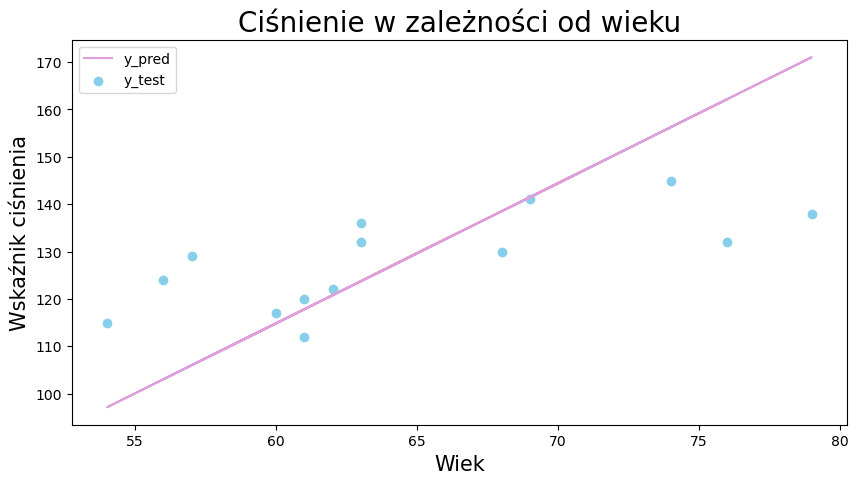

In [89]:
# 8. Porównanie danych testowych z predykcją
plt.figure(figsize=(10,5))
plt.plot(X_test, y_pred, label="y_pred", color="plum")
plt.scatter(X_test, y_test, label="y_test", color='skyblue')
plt.legend()
plt.title("Ciśnienie w zależności od wieku", fontsize=20)
plt.xlabel("Wiek", fontsize=15)
plt.ylabel("Wskaźnik ciśnienia", fontsize=15)
plt.show()

In [90]:
# 9. Walidacja uzyskanych predykcji
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error = {mae}\n" + 
      f"Mean Squared Error = {mse}\n" + 
      f"Root Mean Squared Error {rmse}")

Mean Absolute Error = 12.642857142857155
Mean Squared Error = 267.5976107089665
Root Mean Squared Error 16.358411008070632


## Wnioski
Wyniki modelu dla zbioru SCORES są znacznie lepsze niż zbioru SBP wynika to z tego, ze w drugim zbiorze punkty są bardziej rozbieżnie położone.Widać to dla średniego błedu bezwzględnego, błędu średniokwadratoweg oraz jego pierwiastka 

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [99]:
# 2. Dane z pliku PETROL.csv
petrol = pd.read_csv("PETROL.csv")
print("Shape = ", petrol.shape)
petrol

Shape =  (48, 5)


,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [100]:
petrol.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [101]:
petrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Podatek_paliwowy                 48 non-null     float64
 1   Sredni_przychod                  48 non-null     int64  
 2   Utwardzone_autostrady            48 non-null     int64  
 3   Procent_ludnosci_z_prawem_jazdy  48 non-null     float64
 4   Zuzycie_paliwa                   48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


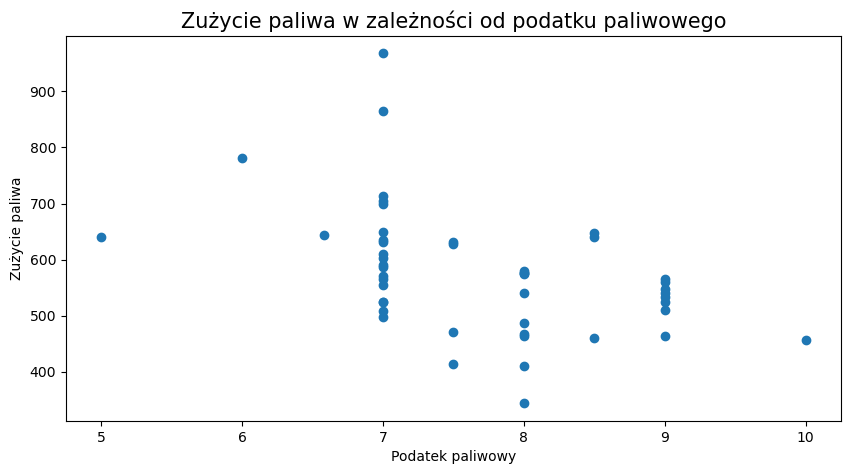

In [103]:
# 3. Wstępny wykres danych
plt.figure(figsize=(10, 5))
plt.scatter(petrol.Podatek_paliwowy, petrol.Zuzycie_paliwa)
plt.title("Zużycie paliwa w zależności od podatku paliwowego", fontsize=15)
plt.xlabel("Podatek paliwowy", fontsize=10)
plt.ylabel("Zużycie paliwa", fontsize=10)
plt.show()

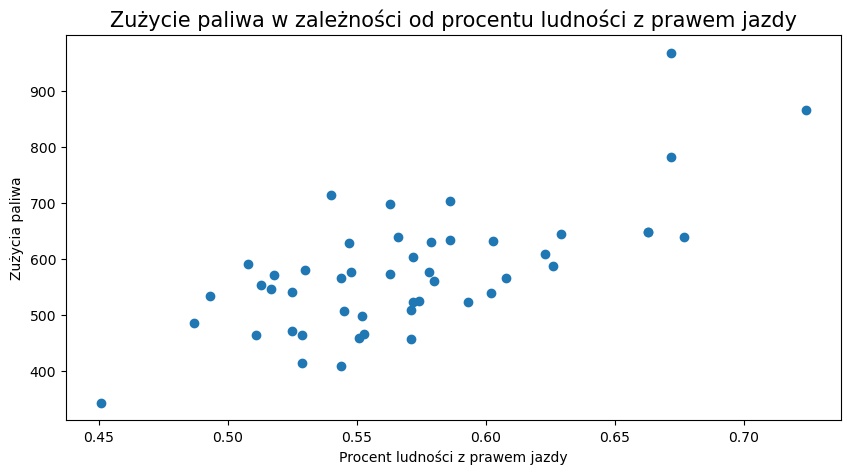

In [104]:
plt.figure(figsize=(10, 5))
plt.scatter(petrol.Procent_ludnosci_z_prawem_jazdy, petrol.Zuzycie_paliwa)
plt.title("Zużycie paliwa w zależności od procentu ludności z prawem jazdy", fontsize=15)
plt.xlabel("Procent ludności z prawem jazdy", fontsize=10)
plt.ylabel("Zużycia paliwa", fontsize=10)
plt.show()

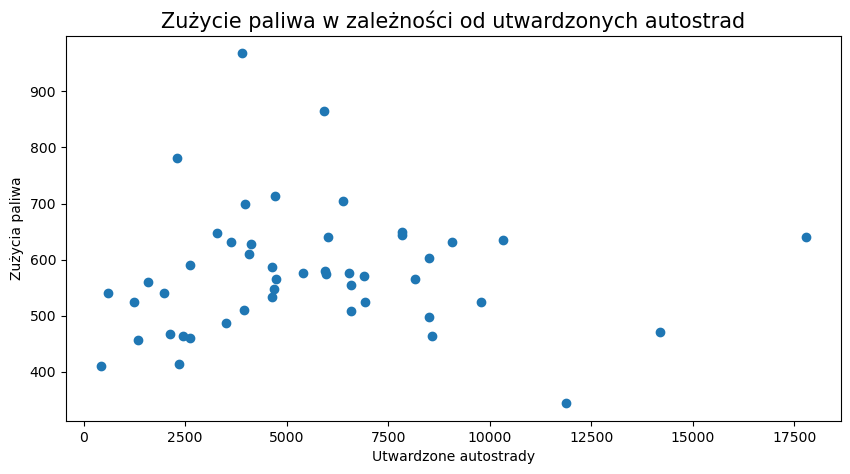

In [105]:
plt.figure(figsize=(10, 5))
plt.scatter(petrol.Utwardzone_autostrady, petrol.Zuzycie_paliwa)
plt.title("Zużycie paliwa w zależności od utwardzonych autostrad", fontsize=15)
plt.xlabel("Utwardzone autostrady", fontsize=10)
plt.ylabel("Zużycia paliwa", fontsize=10)
plt.show()

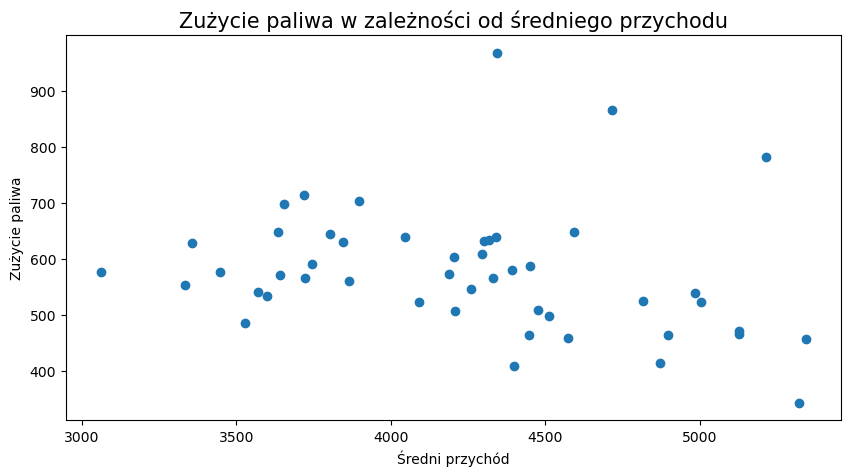

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(petrol.Sredni_przychod, petrol.Zuzycie_paliwa)
plt.title("Zużycie paliwa w zależności od średniego przychodu", fontsize=15)
plt.xlabel("Średni przychód", fontsize=10)
plt.ylabel("Zużycie paliwa", fontsize=10)
plt.show()

In [107]:
# 4. Podział danych na zbiory

# Dana zależna - zużycie paliwa - Zbiór y
# Dane niezależna - pozostałe dane - Zbiór X

# Podział na zbiory testowe, i treningowe
wej = petrol.drop('Zuzycie_paliwa', axis=1)
wyj = petrol.Zuzycie_paliwa

X_train, X_test, y_train, y_test = train_test_split(wej, wyj, train_size=0.3, random_state=42) 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

print("X_train:\n", X_train, end='\n\n')
print("y_train:\n", y_train, end='\n\n')
print("X_test:\n", X_test, end='\n\n')
print("y_test:\n", y_test)

X_train:
 [[5.0000e+00 4.0450e+03 1.7782e+04 5.6600e-01]
 [6.5800e+00 3.8020e+03 7.8340e+03 6.2900e-01]
 [9.0000e+00 4.2580e+03 4.6860e+03 5.1700e-01]
 [7.0000e+00 3.6560e+03 3.9850e+03 5.6300e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [9.0000e+00 4.8970e+03 2.4490e+03 5.1100e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [7.0000e+00 5.0020e+03 9.7940e+03 5.9300e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [7.0000e+00 4.3000e+03 3.6350e+03 6.0300e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [8.0000e+00 4.1880e+03 5.9750e+03 5.6300e-01]
 [8.5000e+00 3.6350e+03 3.2740e+03 6.6300e-01]]

y_train:
 [640 644 547 699 580 464 865 524 649 467 632 566 574 648]

X_test:
 [[7.5000e+00 3.8460e+03 9.0610e+03 5.7900e-01]
 [7.0000e+00 4.4490e+03 4.6390e+03 6.2600e-01]
 [8.0000e+00 3.4480e+03 5.3990e+03 5.4800e-01]
 [7.0000e+00 3.7450e+03 2.6110e+03 5.0800e-01]
 [8.5000e+00 4.5740e+03 2.6190e+03 5.5100e-01]
 [7.0000e+00 3.89

In [108]:
# 5. Model regresji liniowej
reg = LinearRegression().fit(X_train, y_train)
reg_score = reg.score(X_train, y_train)
print("Współczynnik determinacji jest równy:", reg_score)

Współczynnik determinacji jest równy: 0.6941583838054548


In [109]:
# 6. Wskaźniki coef_ oraz intercept_
print("Współczynnik nachylenia prostej w danym modelu jest równy:", reg.coef_)
print("Wyraz wolny w danym modelu jest równy:", reg.intercept_)

Współczynnik nachylenia prostej w danym modelu jest równy: [-2.86965691e+01 -6.14847964e-02 -4.30984349e-03  1.04932979e+03]
Wyraz wolny w danym modelu jest równy: 494.5166409559903


In [110]:
# 7. Predykcja dla części testowej X
y_pred = reg.predict(X_test)
print("Wynik predykcji:\n", y_pred)
print("\nWynik dla posiadanych danych:\n", y_test)

Wynik predykcji:
 [611.3323005  656.98188071 604.70838841 585.18662514 536.25757737
 641.42331012 569.91647526 668.1844088  563.45033034 557.84347856
 509.65112821 524.82442945 360.00496741 714.80889486 629.11043963
 578.50008248 611.31425868 543.21947567 598.49277981 558.78745967
 598.58409327 512.11957997 655.01135472 665.63733818 559.06719855
 598.59890357 583.62935868 472.52145456 453.88000467 543.98642971
 579.48106597 696.92237017 587.66735363 600.38464564]

Wynik dla posiadanych danych:
 [631 587 577 591 460 704 525 640 410 566 464 414 344 968 628 508 714 510
 635 498 603 534 577 610 541 554 571 457 471 487 524 782 540 561]


In [112]:
# 8. Walidacja uzyskanych predykcji
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error = {mae}\n" + 
      f"Mean Squared Error = {mse}\n" + 
      f"Root Mean Squared Error {rmse}")

Mean Absolute Error = 52.34336620170532
Mean Squared Error = 5079.211715651211
Root Mean Squared Error 71.26858856222151


## Wnioski
Wyniki zadania 2 wypadają gorzej w zestawieniu z 1. Z punktu widzenia metryk, których użyłem do porównania są one o 1 rząd gorsze, jednak ten model jest znacznie bardziej zbliżony do rzeczywistości. Ma większą ilość wpływających na wynik zmiennych, ponadto nie są one znormalizowane, więc ich wpływ nie jest równy.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [144]:
# 1. Potrzebne importy
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

In [135]:
# 2. Dane z pliku HEART.csv
heart = pd.read_csv("HEART.csv")
print("Shape = ", heart.shape)
heart

Shape =  (294, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [136]:
heart.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [137]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [138]:
# 3. Przetworzenie danych
# Oznaczenie braku danych ("?") na NaN
heart = heart.replace(['?'], np.NaN)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [139]:
# Usunięcie kolumn zawierających zbyt dużo brakujących danych
heart = heart.drop(columns=['slope', 'ca', 'thal'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [140]:
# Usunięcie wierszy z brakującymi wartościami
heart = heart.dropna(axis=0, thresh=11)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [141]:
# 4. Zakodowanie niezależnych zmiennych kategorialnych - cp i restecg 
heart = pd.get_dummies(heart, columns=['cp', 'restecg'])
heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
292,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [142]:
# 5. Podział na zbiory testowe, i treningowe
cols = list(heart.columns)
if 'num' not in cols:
    heart.rename(columns={'num       ': 'num'}, inplace=True)
    
wej = heart.drop('num', axis=1)
wyj = heart['num'] 

X_train, X_test, y_train, y_test = train_test_split(np.array(wej), np.array(wyj), train_size=0.2, random_state=42)

In [143]:
# 6. Regresja logistyczna
model = LogisticRegression(max_iter=2000).fit(X_train, y_train)
y_pred = model.predict(X_test)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler2.transform(X_test)
model_scaled = LogisticRegression(max_iter=2000).fit(X_train_scaled, y_train)

print('Dokładność dla danych testowych z pomocą dwóch metryk')
print("Nieustandaryzowane: ", model.score(X_test, y_test))
print("Skalowanie: ", model_scaled.score(X_test_scaled, y_test))

Dokładność dla danych testowych z pomocą dwóch metryk
Nieustandaryzowane:  0.7799043062200957
Skalowanie:  0.7703349282296651


In [146]:
# 7. Ocena wyników za pomocą metryk
print("Classification method: \n", classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Classification method: 
               precision    recall  f1-score   support

     class 0       0.89      0.74      0.81       133
     class 1       0.65      0.84      0.74        76

    accuracy                           0.78       209
   macro avg       0.77      0.79      0.77       209
weighted avg       0.81      0.78      0.78       209

Accuracy: 0.7799043062200957
Precision: 0.6530612244897959
Recall: 0.8421052631578947


## Wnioski
Około 78% danych zostało sklasyfikowanych prawidłowo, zatem wyniki można uznać za zadowalające.